# Power Law and The Samll World Phenomena
## Contents: 

1. The power law distribution and the rich-get-richer phenomena
2. The small world phenomenon
3. Real social network 

## 1. The Power Law Distribution and The Rich-Get-Richer Phenomena

- Popularity is characterized by extreme imbalances 
- People know people in their immediate social circles 
- A few people achieve wider visibility
- A very, very few attain global name recognition 
- Also known as Pareto principle, 80/20 ...

### Preferential Attachment Model Algorithm
1. The model starts with two nodes connected by an edge.
2. At each step, a new node is added. 
3. A new node picks an existing node to connect to randomly, but with some bias. 
4. Bias: a node's chance of being selected is directly proportional to the number of connections it already has, or its "degree." 
5. That why this model is called "preferential attachment."
6. This model is formulated by the scientist Albert Barabasi.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# Configure plotting in Jupyter
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator
import random
from numpy import random as nprand
seed = hash("Network Science in Python") % 2**32
nprand.seed(seed)
random.seed(seed)

### Simulating Power Law
First let's see how a random graph differ than an Albert Barabasi graph

In [3]:
n = 1000
p = 0.2
G_erdos = nx.erdos_renyi_graph(n,p, seed =100)# Plot the graph

/Users/Ghada/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


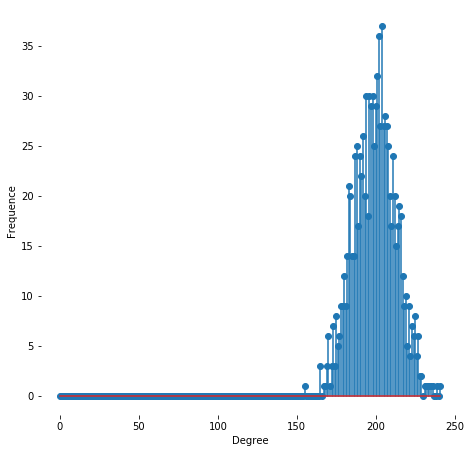

In [4]:
degree_freq = np.array(nx.degree_histogram(G_erdos)).astype('float')
plt.stem(degree_freq)
plt.ylabel("Frequence")
plt.xlabel("Degree")
plt.show()

/Users/Ghada/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


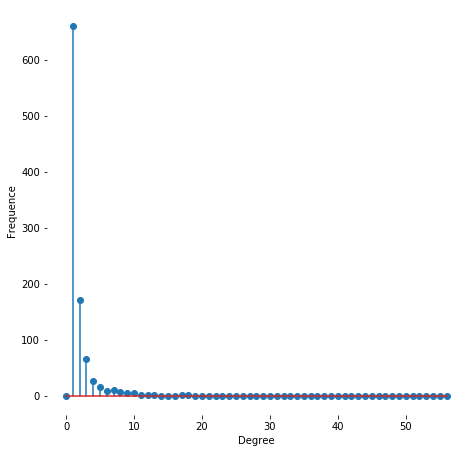

In [5]:
# Now let't see the preferential attachment model 

n = 1000
m = 1
G_barabasi = nx.barabasi_albert_graph(n,m)

# plotting

degree_freq = np.array(nx.degree_histogram(G_barabasi)).astype('float')
plt.stem(degree_freq)
plt.ylabel("Frequence")
plt.xlabel("Degree")
plt.show()

/Users/Ghada/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


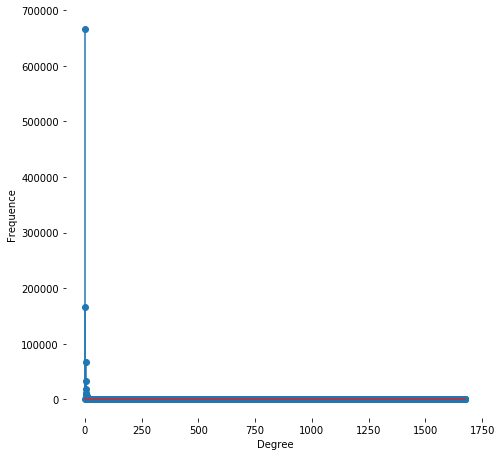

In [6]:
# Now let't try with more nodes..

n = 1000000
m = 1
G_barabasi = nx.barabasi_albert_graph(n,m)

# plotting

degree_freq = np.array(nx.degree_histogram(G_barabasi)).astype('float')
plt.stem(degree_freq)
plt.ylabel("Frequence")
plt.xlabel("Degree")
plt.show()

Even harder to spot anything, so we need the log scale...

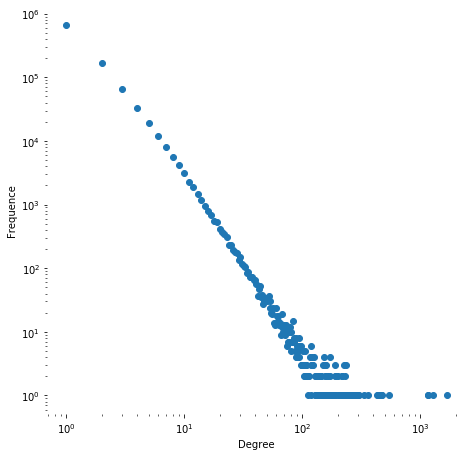

In [7]:
plt.plot(degree_freq, 'o')
plt.ylabel("Frequence")
plt.xlabel("Degree")
plt.xscale('log')
plt.yscale('log')
plt.show()

### In general, how to tell if a graph exhibit a power law distribution?

*Answer*: power law graph degree distribution (log scale) always looks like a straight line.

## 2. The Samll World Phenomenon 

- Milgram experiment, 67
- This experiment demonstrated two interesting facts about large social networks: 
    - Short paths are there in abundance.
    - People, without knowing the global “map” of the network, are effective at collectively finding these short paths. 




Duncan Watts and Steve Strogatz stated that this model follows naturally from a combination of two basic social network ideas: 
- Homophily:  creates many triangles.
- Weak ties: produce the type of widely branching structure that reaches many nodes in a few steps. 

<img src="smallworld.png" alt="Small World" style="width: 800px;"/>

### Algorithm Description

1. Create a ring lattice with N nodes.
2. Each node has a degree of K, meaning: each node is connected to its K nearest neighbors.
3. For each edge in the graph, rewire the target node with probability p. The rewired edge cannot be a duplicate or self-loop.

After the first step the graph is a perfect ring lattice. Let's see examples.

/Users/Ghada/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


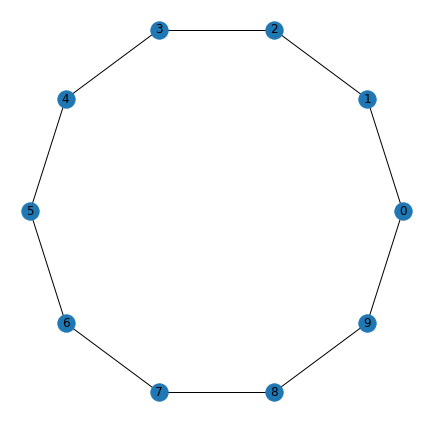

In [8]:
# n: number of nodes
# k: Each node is connected to k nearest neighbors in ring topology
# p: The probability of rewiring each edge

n = 10 
k = 2
p = 0

G = nx.watts_strogatz_graph(n,k,p)
pos = nx.circular_layout(G) 
nx.draw_networkx(G, pos)

- After the first step the graph is a perfect ring lattice. 
- When p = 0, no edges are rewired and the model returns a ring lattice. 
- In contrast, when p = 1, all of the edges are rewired and the ring lattice is transformed into a random graph.

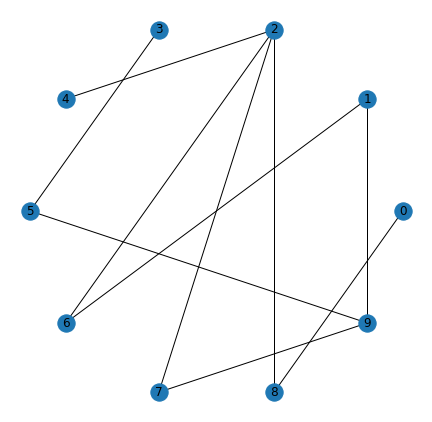

In [9]:
p = 1
G = nx.watts_strogatz_graph(n, k, p)
pos = nx.circular_layout(G) 
nx.draw_networkx(G, pos)

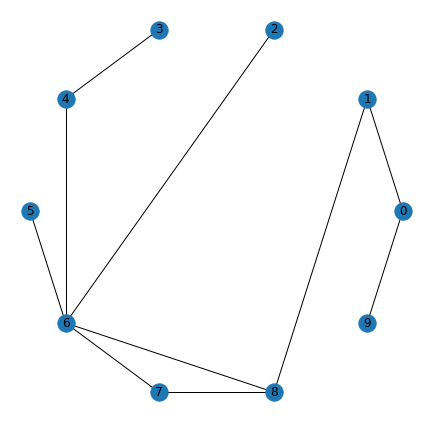

In [10]:
p = 0.4
G = nx.watts_strogatz_graph(n, k, p)
pos = nx.circular_layout(G) 
nx.draw_networkx(G, pos)

### How can we tell if a graph has the small world property or not?

Small world graphs have to basic properties:
1. It has reltivly small average shotest path beacuse of the existence of weak ties.
2. It has relativley high clustering coefficient because of homophily.

So le't check our example..

In [11]:
nx.average_shortest_path_length(G), nx.average_clustering(G)

(2.6222222222222222, 0.14333333333333334)

Relatively small average shortest path, and high clustering coefficient, so we have a network that satisfy the small world phenomenon. <br> <br>

### The Degree Distribution of Small World Graphs

/Users/Ghada/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


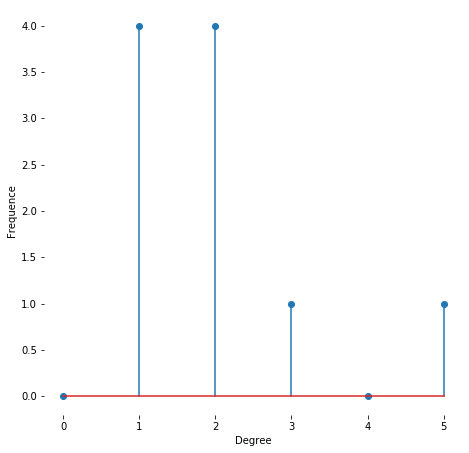

In [12]:
degree_freq = np.array(nx.degree_histogram(G)).astype('float')
plt.stem(degree_freq)
plt.ylabel("Frequence")
plt.xlabel("Degree")
plt.show()

## 3. Real Social Network

In [13]:
# Load facebook data file into network

G_social = nx.read_edgelist('facebook_combined.txt')

In [14]:
G_social.order(), G_social.size()

(4039, 88234)

/Users/Ghada/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


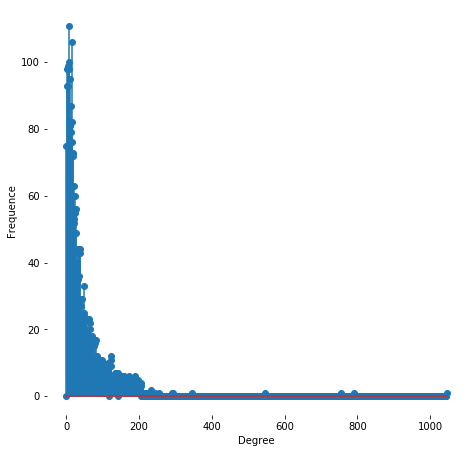

In [15]:
degree_freq = np.array(nx.degree_histogram(G_social)).astype('float')
plt.stem(degree_freq)
plt.ylabel("Frequence")
plt.xlabel("Degree")
plt.show()

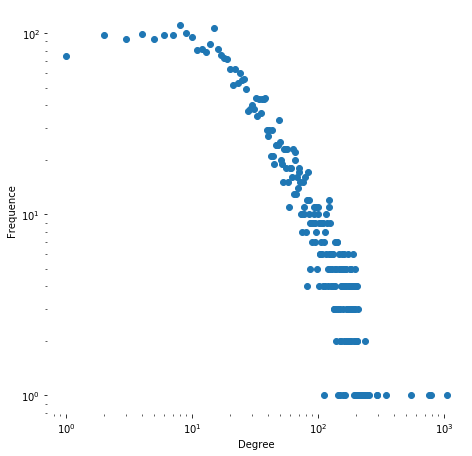

In [16]:
# log scale

plt.plot(degree_freq, 'o')
plt.ylabel("Frequence")
plt.xlabel("Degree")
plt.xscale('log')
plt.yscale('log')
plt.show()

## Your Turn

#### Q1: Create a watts-strogatz graph with 1000 nodes, 6 niebors for each node and probability of rewiring 0.04.

#### Q2: Plot the degree distribution for the graph. What do you observe? Why did we get this result?

#### Q3: What is a degree distribution?

#### Q4: Does facebook network exhibit a power law? why or why not?  

#### Q5: Does facebook network have the small world characteristics? How can you tell?

#### Q6 : Which of the mechanisms facebook offers for users contributes in achieving the small world phenomenon? Explain.
Example mechanisms: likes, follow, share etc..

#### Q7: Which of the mechanisms Twitter offers for users contributes in achieving the power law  phenomenon? Explain.
Example mechanisms: likes, follow, retweet, etc..

#### Q8: Can you think of other real-world example where we would see a power law distribution? How about small world?